# What is IForest behavior according to the dataset dimension size?

## Test with 1 dimension dataset

In [1]:
import sys
sys.path.append('../../../../../')
from datasets import datasets as datat
from IForest_DODiMDS import iforest_D as IFD
from metrics import performances
from metrics import visualization
visu = visualization.visualization()

import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

import matplotlib.cm as cm
from mpl_toolkits import mplot3d


## Generals settings

In [2]:
max_samples = 256
n_trees = 100
threshold = 0.6
min_sample_size = 5
sample_size_step = 5

## Chargement du jeu de données

In [3]:
dts = datat.synthetic_datasets(path_top="../../../../../")
X_brut, y_transform, full_dataset = dts.TwoD_V1_1()
X_brut.describe()

Columns number = 3


,0,1
count,1516.000000,1516.000000
mean,-0.008985,0.095082
std,3.566090,3.632538
min,-6.921162,-6.990388
25%,-2.998816,-2.932963
50%,0.106389,0.111885
75%,3.002389,3.155589
max,6.916182,6.946129


In [4]:
dts.description

"Jeu de données à 2 dimensions constitué de données normales et 1% de données anormales. Les données anormales se retrouvent au centre d'un grand cercle formé par les données normales. Ici, les données anormales sont plus proches des données normales mais et se ressemblent beaucoup. \n Données normales : Données aléatoire uniforme, X1 entre -10 et 10, X2 entre -7 et 7, size = 1500, distance euclidienne entre 2 et 7 \n Données anormales : Données aléatoire gaussienne, mu = 0, sigma = 0.5, size = 15."

In [5]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 3 columns):
0    1516 non-null float64
1    1516 non-null float64
2    1516 non-null object
dtypes: float64(2), object(1)
memory usage: 35.7+ KB


In [6]:
X_brut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 2 columns):
0    1516 non-null float64
1    1516 non-null float64
dtypes: float64(2)
memory usage: 23.8 KB


In [7]:
y_transform.describe()

,0
count,1516.000000
mean,0.980211
std,0.198020
min,-1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
y_transform

,0
0,1
1,1
2,1
3,1
4,1
...,...
1511,-1
1512,-1
1513,-1
1514,-1


## Execution of Iforest to get the best performance

In [9]:
roc_aucs = []
specificities = []
for i in range(10):
    # Instanciation, fit and predict
    func_IFD = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
    func_IFD.fit(X_brut)
    IFD_y_pred_IF, IFD_scores = func_IFD.predict(X=X_brut, threshold=threshold)

    # Matrice de confusion
    ttn, tfp, tfn, ttp = confusion_matrix(y_transform, IFD_y_pred_IF).ravel()
    print(confusion_matrix(y_transform, IFD_y_pred_IF))
    #ROC AUC
    roc_aucs.append(roc_auc_score(y_transform, IFD_y_pred_IF))
    # Specificity
    specificities.append(specificity_score(y_transform, IFD_y_pred_IF))
print("ROC AUC")
print(roc_aucs)
print("Specificities")
print(specificities)
min_roc_auc = max(roc_aucs)
print("min_roc_auc = "+str(min_roc_auc))

[[   0   15]
 [ 203 1298]]
[[   0   15]
 [ 209 1292]]
[[   0   15]
 [ 192 1309]]
[[   0   15]
 [ 195 1306]]
[[   0   15]
 [ 187 1314]]
[[   0   15]
 [ 175 1326]]
[[   0   15]
 [ 191 1310]]
[[   0   15]
 [ 201 1300]]
[[   0   15]
 [ 175 1326]]
[[   0   15]
 [ 188 1313]]
ROC AUC
[0.4323784143904064, 0.43037974683544306, 0.43604263824117256, 0.4350433044636909, 0.43770819453697535, 0.4417055296469021, 0.4363757495003331, 0.4330446369087275, 0.4417055296469021, 0.43737508327781477]
Specificities
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
min_roc_auc = 0.4417055296469021


In [10]:
# Varier le seuil de décision pour voir l'impact
for i in np.arange(0.1, 1., 0.1):
    print("threshold = "+str(i))
    # Instanciation, fit and predict
    func_IFD = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
    func_IFD.fit(X_brut)
    IFD_y_pred_IF, IFD_scores = func_IFD.predict(X=X_brut, threshold=i)
    # Matrice de confusion
    #ttn, tfp, tfn, ttp = confusion_matrix(y_transform, IFD_y_pred_IF).ravel()
    print(confusion_matrix(y_transform, IFD_y_pred_IF))

threshold = 0.1
[[  15    0]
 [1501    0]]
threshold = 0.2
[[  15    0]
 [1501    0]]
threshold = 0.30000000000000004
[[  15    0]
 [1501    0]]
threshold = 0.4
[[  15    0]
 [1501    0]]
threshold = 0.5
[[  15    0]
 [1501    0]]
threshold = 0.6
[[   0   15]
 [ 173 1328]]
threshold = 0.7000000000000001
[[   0   15]
 [   0 1501]]
threshold = 0.8
[[   0   15]
 [   0 1501]]
threshold = 0.9
[[   0   15]
 [   0 1501]]


In [11]:
(119/(119+1382))*100

7.928047968021319

### Execution Of EIF on dataset

In [12]:
import eif
X_brut_numpy = X_brut.to_numpy()

In [13]:
F1  = eif.iForest(X_brut_numpy, ntrees=n_trees, sample_size=max_samples, ExtensionLevel=0)
S1 = F1.compute_paths(X_in=X_brut_numpy)
P1 = np.where(S1>=threshold,-1,1)

# Matrice de confusion
#ttn, tfp, tfn, ttp = confusion_matrix(y_transform_Shuttle, MS_y_pred_IF_Shuttle).ravel()
print(confusion_matrix(y_transform, P1))

[[   0   15]
 [  14 1487]]


In [14]:
# Varier le seuil de décision pour voir l'impact
for i in np.arange(0.1, 1., 0.1):
    print("threshold = "+str(i))
    # Instanciation, fit and predict
    F1  = eif.iForest(X_brut_numpy, ntrees=n_trees, sample_size=max_samples, ExtensionLevel=0)
    S1 = F1.compute_paths(X_in=X_brut_numpy)
    P1 = np.where(S1>=i,-1,1)
    # Matrice de confusion
    #ttn, tfp, tfn, ttp = confusion_matrix(y_transform, IFD_y_pred_IF).ravel()
    print(confusion_matrix(y_transform, P1))

threshold = 0.1
[[  15    0]
 [1501    0]]
threshold = 0.2
[[  15    0]
 [1501    0]]
threshold = 0.30000000000000004
[[  15    0]
 [1501    0]]
threshold = 0.4
[[  15    0]
 [1501    0]]
threshold = 0.5
[[ 12   3]
 [680 821]]
threshold = 0.6
[[   0   15]
 [   6 1495]]
threshold = 0.7000000000000001
[[   0   15]
 [   0 1501]]
threshold = 0.8
[[   0   15]
 [   0 1501]]
threshold = 0.9
[[   0   15]
 [   0 1501]]


EIF ne détecte pas les anomalies. En fait, EIF considère toutes les données comme étant normales

In [15]:
roc_auc_IF = []
max_samples_IF = []
specificities = []

for j in range(min_sample_size, len(X_brut), sample_size_step):
    print("max_samples = "+str(j))
    max_samples = j
    # Instanciation, fit and predict
    func_IF = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
    func_IF.fit(X_brut)
    y_pred_IF, scores = func_IF.predict(X=X_brut, threshold=threshold)
    
    #Confusion matrix
    print(confusion_matrix(y_transform, y_pred_IF))
    
    # Specificity
    specificities.append(specificity_score(y_transform, y_pred_IF))

    auc_IF = roc_auc_score(y_transform, y_pred_IF)
    if auc_IF >= min_roc_auc:
        print("auc_IF = "+str(auc_IF))
        roc_auc_IF.append(auc_IF)
        max_samples_IF.append(j)

max_samples = 5
[[  15    0]
 [1501    0]]
auc_IF = 0.5
max_samples = 10
[[  15    0]
 [1501    0]]
auc_IF = 0.5
max_samples = 15
[[  15    0]
 [1501    0]]
auc_IF = 0.5
max_samples = 20
[[  15    0]
 [1501    0]]
auc_IF = 0.5
max_samples = 25
[[  15    0]
 [1501    0]]
auc_IF = 0.5
max_samples = 30
[[  15    0]
 [1501    0]]
auc_IF = 0.5
max_samples = 35
[[  15    0]
 [1501    0]]
auc_IF = 0.5
max_samples = 40
[[  15    0]
 [1501    0]]
auc_IF = 0.5
max_samples = 45
[[  15    0]
 [1501    0]]
auc_IF = 0.5
max_samples = 50
[[  15    0]
 [1501    0]]
auc_IF = 0.5
max_samples = 55
[[  15    0]
 [1501    0]]
auc_IF = 0.5
max_samples = 60
[[  15    0]
 [1501    0]]
auc_IF = 0.5
max_samples = 65
[[  15    0]
 [1501    0]]
auc_IF = 0.5
max_samples = 70
[[  14    1]
 [1477   24]]
auc_IF = 0.4746613368865201
max_samples = 75
[[   6    9]
 [1349  152]]
max_samples = 80
[[  11    4]
 [1319  182]]
max_samples = 85
[[   0   15]
 [1113  388]]
max_samples = 90
[[  0  15]
 [985 516]]
max_samples = 95

[[   0   15]
 [  28 1473]]
auc_IF = 0.49067288474350435
max_samples = 660
[[   0   15]
 [  26 1475]]
auc_IF = 0.49133910726182545
max_samples = 665
[[   0   15]
 [  29 1472]]
auc_IF = 0.49033977348434377
max_samples = 670
[[   0   15]
 [  32 1469]]
auc_IF = 0.4893404397068621
max_samples = 675
[[   0   15]
 [  28 1473]]
auc_IF = 0.49067288474350435
max_samples = 680
[[   0   15]
 [  22 1479]]
auc_IF = 0.4926715522984677
max_samples = 685
[[   0   15]
 [  16 1485]]
auc_IF = 0.49467021985343107
max_samples = 690
[[   0   15]
 [  25 1476]]
auc_IF = 0.491672218520986
max_samples = 695
[[   0   15]
 [  24 1477]]
auc_IF = 0.49200532978014655
max_samples = 700
[[   0   15]
 [  23 1478]]
auc_IF = 0.49233844103930713
max_samples = 705
[[   0   15]
 [  22 1479]]
auc_IF = 0.4926715522984677
max_samples = 710
[[   0   15]
 [  24 1477]]
auc_IF = 0.49200532978014655
max_samples = 715
[[   0   15]
 [  25 1476]]
auc_IF = 0.491672218520986
max_samples = 720
[[   0   15]
 [  18 1483]]
auc_IF = 0.4940039

[[   0   15]
 [   7 1494]]
auc_IF = 0.49766822118587606
max_samples = 1215
[[   0   15]
 [   8 1493]]
auc_IF = 0.49733510992671554
max_samples = 1220
[[   0   15]
 [   9 1492]]
auc_IF = 0.49700199866755496
max_samples = 1225
[[   0   15]
 [   9 1492]]
auc_IF = 0.49700199866755496
max_samples = 1230
[[   0   15]
 [   9 1492]]
auc_IF = 0.49700199866755496
max_samples = 1235
[[   0   15]
 [   9 1492]]
auc_IF = 0.49700199866755496
max_samples = 1240
[[   0   15]
 [  10 1491]]
auc_IF = 0.4966688874083944
max_samples = 1245
[[   0   15]
 [   8 1493]]
auc_IF = 0.49733510992671554
max_samples = 1250
[[   0   15]
 [   9 1492]]
auc_IF = 0.49700199866755496
max_samples = 1255
[[   0   15]
 [   8 1493]]
auc_IF = 0.49733510992671554
max_samples = 1260
[[   0   15]
 [   7 1494]]
auc_IF = 0.49766822118587606
max_samples = 1265
[[   0   15]
 [   9 1492]]
auc_IF = 0.49700199866755496
max_samples = 1270
[[   0   15]
 [   8 1493]]
auc_IF = 0.49733510992671554
max_samples = 1275
[[   0   15]
 [   5 1496]]

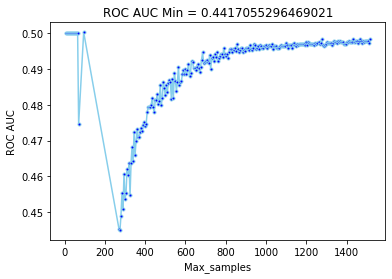

In [16]:
visu.plot_2D(max_samples_IF, roc_auc_IF,'Max_samples', 'ROC AUC', "ROC AUC Min = "+str(min_roc_auc), link="b").show()

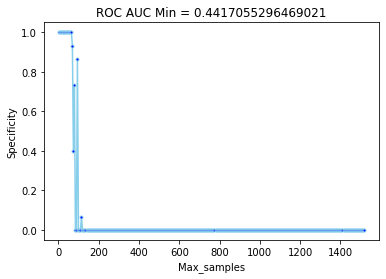

In [17]:
visu.plot_2D(range(min_sample_size, len(X_brut), sample_size_step), specificities,'Max_samples', 'Specificity', "ROC AUC Min = "+str(min_roc_auc), link="b").show()

## Conclusion

IForest ne détecte pas les anomalies et fait de fausses alertes.